In [1]:
# Import library
import re
import os
import shutil
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from matplotlib.ticker import FuncFormatter

In [2]:
# Mengambil file dari directory
directory_path = '/Users/williamnehemia/Documents/Skripsi/TugasAkhir/WordEmbeddingModel/Data/Data_asli'

files = os.listdir(directory_path)
files_new = []

for file in files:
    if '.DS_Store' not in file:
        files_new.append(file)

In [3]:
# Mengambil jumlah kalimat dari satu paragraf
jumlah_kalimat = {}
for file in files_new:
    with open('/Users/williamnehemia/Documents/Skripsi/TugasAkhir/WordEmbeddingModel/Data/Data_asli/' + file, 'r') as fileNow:
        content = fileNow.read()
        lines = content.splitlines()
        for line in lines:
            if len(line) > 0:
                jumlah_titik = line.count('.')
                if jumlah_titik in jumlah_kalimat:
                    curr = jumlah_kalimat[jumlah_titik] + 1
                    jumlah_kalimat[jumlah_titik] = curr
                else:
                    jumlah_kalimat[jumlah_titik] = 1

In [4]:
# mengubah jumlah kalimat per pargaraf dari dictionary menjaid list
max_key = max(jumlah_kalimat, key=jumlah_kalimat.get)
print()
for i in range(1, max_key+1):
    if i not in jumlah_kalimat:
        jumlah_kalimat[i] = 0
keys_jumlah_kalimat = list(jumlah_kalimat.keys())
values_jumlah_kalimat = list(jumlah_kalimat.values())



    
print(keys_jumlah_kalimat)
print(values_jumlah_kalimat)


[7, 5, 10, 3, 4, 6, 11, 9, 8, 15, 14, 12, 2, 1, 13, 17]
[249, 623, 87, 1377, 991, 377, 17, 122, 165, 4, 4, 10, 8, 1, 5, 3]


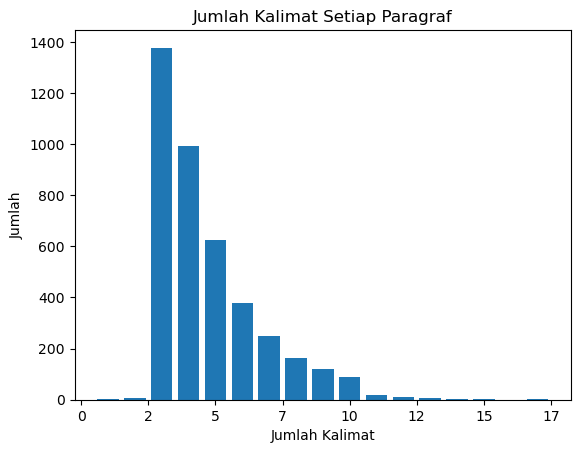

In [5]:
# Membuat visualisasi jumlah kalimat setiap paragraf

# untuk mengatur agar label sumbu x bilangan bulat
def format_value(value, tick_number):
    return int(value)

"""
def add_labels(plt, x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
"""

# membuat visualisasi jumlah kalimat setiap paragraf
plt.bar(keys_jumlah_kalimat, values_jumlah_kalimat)
plt.xlabel('Jumlah Kalimat')
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_value))
plt.ylabel('Jumlah')
plt.title('Jumlah Kalimat Setiap Paragraf')
plt.show()

In [6]:
# Menghitung jumlah paragaraf untuk setiap karya tulis ilmiah
jumlah_paragraf = {}
for file in files_new:
    jumlah_paragraf_curr = 0
    with open('/Users/williamnehemia/Documents/Skripsi/TugasAkhir/WordEmbeddingModel/Data/Data_asli/' + file, 'r') as fileNow:
        content = fileNow.read()
        lines = content.splitlines()
        for line in lines:
            if len(line) > 0:
                jumlah_paragraf_curr += 1
    if jumlah_paragraf_curr in jumlah_paragraf:
        curr = jumlah_paragraf[jumlah_paragraf_curr] + 1
        jumlah_paragraf[jumlah_paragraf_curr]  = curr
    else:
        jumlah_paragraf[jumlah_paragraf_curr] = 1
        

In [7]:
# mengubah jumlah paragaraf untuk setiap karya tulis ilmiah yang disimpan di dictionary menjadi list
keys_jumlah_paragraf = list(jumlah_paragraf.keys())
values_jumlah_paragraf = list(jumlah_paragraf.values())
print(keys_jumlah_paragraf)
print(values_jumlah_paragraf)

[3, 4, 5, 2]
[301, 346, 350, 3]


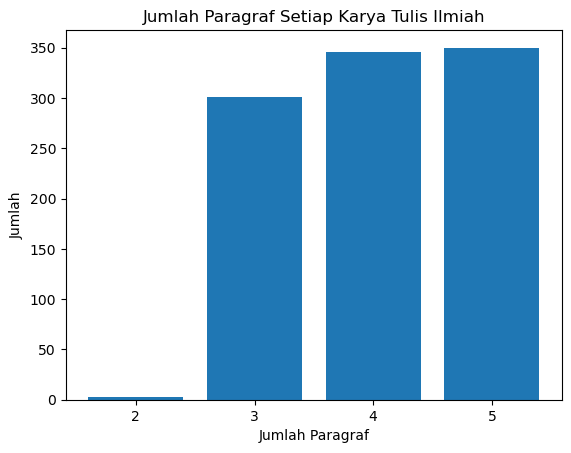

In [11]:
# membuat visualisasi jumlah pargaraf setiap karya tulis ilmiah
plt.bar(keys_jumlah_paragraf, values_jumlah_paragraf)

# ubah nilai sumbu x menjadi integer (menghilangkan nilai float)
plt.xticks(keys_jumlah_paragraf, [str(int(value)) for value in keys_jumlah_paragraf])

plt.xlabel('Jumlah Paragraf')
plt.ylabel('Jumlah')
plt.title('Jumlah Paragraf Setiap Karya Tulis Ilmiah')
plt.show()

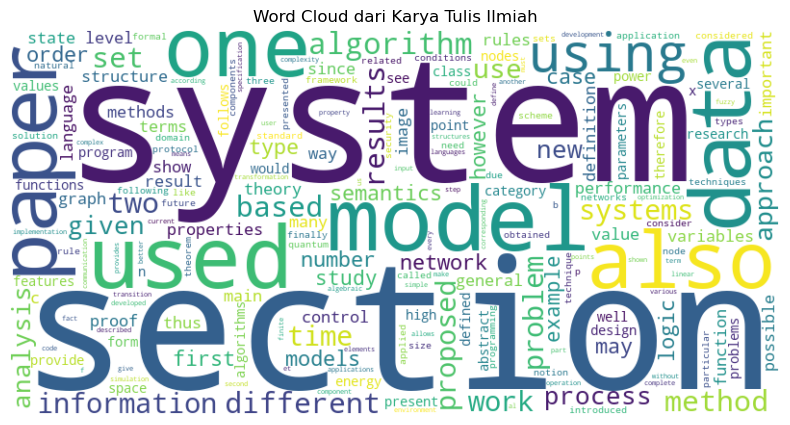

In [9]:
# Membuat word cloud

# untuk menyimpan teks
all_text = ""

# mengambil teks dari seluruh file
for file in files_new:
    jumlah_paragraf_curr = 0
    with open('/Users/williamnehemia/Documents/Skripsi/TugasAkhir/WordEmbeddingModel/Data/Data_asli/' + file, 'r') as fileNow:
        content = fileNow.read()
        lines = content.splitlines()
        for line in lines:
            all_text += " " + line
            
# melakukan tokenisasi
tokens = word_tokenize(all_text)

# mengambil stopwords dan menghapus stopwords
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token.isalpha() and token not in stop_words]

# menghitung jumlah kata untuk setiap kata
word_freq = Counter(tokens)

# membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Word Cloud dari Karya Tulis Ilmiah')
plt.show()